<a href="https://colab.research.google.com/github/dominikkrisnah/DataScience_MachineLearning_Project/blob/main/Exploratory-Data-Analysis/EDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By: Dominikus Krisna Herlambang | ©2022

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Changing matplotlib default parameters
The matplotlib default parameters can be changed with rcParams as follows (optional: plot aesthetics)


In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (12, 4)
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'small'
rcParams['ytick.labelsize'] = 'small'

## Load dataset

For our hands-on we will look at a synthetic dataset of baldness prediction. To keep the running time short, this time we will only take a sample of 1000 rows of data.

In [ ]:
# change file path if necessary
df = pd.read_csv('data-projcet/botak.csv').sample(1000, random_state=42)

## Descriptive Statistics
### Checking columns and missing values ​​with `df.info()`

The first thing that is usually done in EDA is to check the data type of each column and the number of missing values. We can do this by using `df.info()`.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1142 to 7212
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           1000 non-null   float64
 1   jenis_kelamin  1000 non-null   object 
 2   pekerjaan      986 non-null    object 
 3   provinsi       1000 non-null   object 
 4   gaji           1000 non-null   float64
 5   is_menikah     1000 non-null   int64  
 6   is_keturunan   997 non-null    float64
 7   berat          1000 non-null   float64
 8   tinggi         1000 non-null   float64
 9   sampo          1000 non-null   object 
 10  is_merokok     1000 non-null   int64  
 11  pendidikan     1000 non-null   object 
 12  botak_prob     1000 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 109.4+ KB


We can see that:
* The dataframe has a total of 1000 rows and 13 columns
* The dataframe still has *null* values ​​in the `pekerja` and `jenis_kelamin` columns
* The modeling target is the `bald_prob` column with a data type of `float64`
* This means that the rest are *features* (predictors)

From the information above, we can separate the categorical and numerical columns as follows:

In [ ]:
# best practice
cats = ['jenis_kelamin', 'pekerjaan', 'sampo', 'pendidikan', 'provinsi']
nums = ['umur', 'gaji', 'is_menikah', 'is_keturunan', 'berat', 'tinggi', 'is_merokok', 'botak_prob']

Storing column names based on the *numeric* and *categorical* types as above is not mandatory, but it will make some processes easier in the future.

### Sampling to understand data with `df.sample()`

After knowing what columns are in the dataset, we do sampling to make sure the contents of the columns are as expected. Make sure to do this several times because often if there is an oddity it will not come out on the first sampling.

Sampling can be done using `df.sample()`

In [ ]:
df.sample(5)

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,botak_prob
6915,31.0,Perempuan,Pegawai swasta,Banjarmasin,1.422261e+07,0,0.0,67.854187,159.103708,Pantone,1,S1,0.228288
1018,39.0,Perempuan,Pegawai swasta,Pekanbaru,5.997825e+06,0,0.0,49.998701,158.307929,Merpati,0,S1,0.137224
1966,37.0,Perempuan,PNS,Pontianak,6.479915e+06,0,0.0,52.889259,152.292695,Merpati,1,SMA,0.369387
7151,29.0,Laki-laki,Pegawai swasta,Pekanbaru,8.885055e+06,0,0.0,44.320597,152.342323,Merpati,0,S1,0.200906
1103,38.0,Perempuan,Pegawai swasta,Palu,5.934515e+06,0,0.0,54.416130,156.780095,Shoulder & Head,0,S1,0.118384


Some observations:
* Our target, `bald_prob` is indeed a float with a range of 0-1, where 1 represents 100% probability.
* There doesn't seem to be anything strange about the input of each column (it's correct).

### Statistical summary with `df.describe()`
Next we display the statistical summary of the dataframe, both for numerical and categorical. This is done to briefly check for the presence of outliers and distribution characteristics for numeric `features`.

In [ ]:
df[nums].describe()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,botak_prob
count,1000.000000,1.000000e+03,1000.000000,997.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.517000,9.338530e+06,0.035000,0.179539,55.960354,157.308522,0.485000,0.384868
std,10.031667,4.816192e+06,0.183872,0.383995,9.441493,6.550181,0.500025,0.193882
min,4.000000,1.990399e+06,0.000000,0.000000,41.754150,138.487317,0.000000,-0.115700
25%,33.000000,5.985189e+06,0.000000,0.000000,49.723461,152.782408,0.000000,0.241132
50%,39.000000,8.082501e+06,0.000000,0.000000,53.780701,156.979853,0.000000,0.365464
75%,46.000000,1.162239e+07,0.000000,0.000000,59.645683,161.242447,1.000000,0.508360
max,72.000000,3.713150e+07,1.000000,1.000000,128.643924,193.484937,1.000000,1.000000


Some observations from the statistical summary of the numeric columns above:
* The distribution of values ​​in the `age` column looks normal/symmetric (the mean and median are quite close, and the Q2 value is roughly in the middle of Q1 - Q3).
* While the `salary` column seems asymmetric, because the mean > median.
* There are rows that have a negative `bald_prob` probability. These rows should be removed in the pre-processing stage later.

In [ ]:
# number of rows with negative bald_prob
df[df['botak_prob']<0].shape[0]

7

In [ ]:
df[cats].describe()

,jenis_kelamin,pekerjaan,sampo,pendidikan,provinsi
count,1000,986,1000,1000,1000
unique,2,4,5,6,34
top,Laki-laki,Pegawai swasta,Merpati,S1,Mataram
freq,654,403,225,565,44


Some observations from the statistical summary of the categorical columns above:
* The majority of the data is Male (Top column `gender_type` is `Male` with a frequency of 684).
* The `province` column has a large number of unique values; it is probably not very useful as a predictor.

## Univariate Analysis
After doing a simple analysis of descriptive statistics, now we focus on each column one by one with *Univariate Analysis*

### Box plots

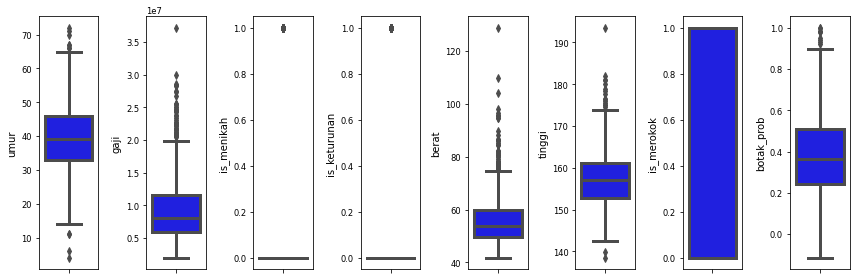

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

For boxplots, the most important thing we need to pay attention to is the presence of outliers.
* Outliers are seen mainly in the `salary`, `weight`, and `height` columns.
* From the boxplot, we can see which distributions look a bit *skewed* (not symmetrical) which is indicated by the location of the box far from the center of the Y-axis: `salary`, `weight`, `height`.

### Dist plots

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

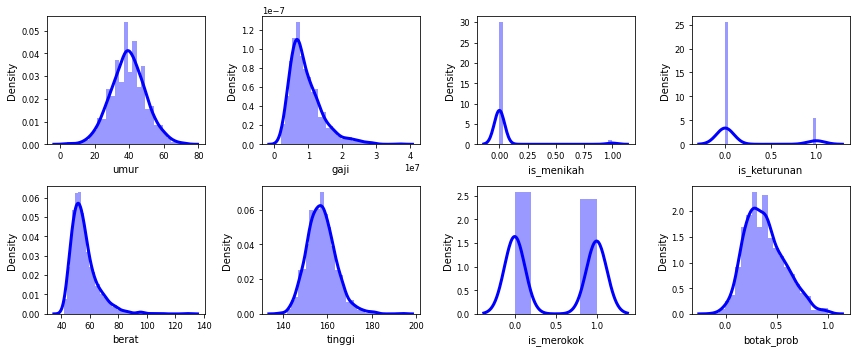

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)//2, i+1)
    sns.distplot(df[nums[i]], color='blue')
    plt.tight_layout()

For the distribution plot, the main thing to note is the shape of the distribution:
* As we might have guessed when looking at the boxplot above, the `salary`, `weight`, and `height` columns are slightly *skewed*.
* This means that we may need to do something to these columns later.
* Other than those columns, the distribution looks fairly symmetrical.

### Count plot (categorical)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

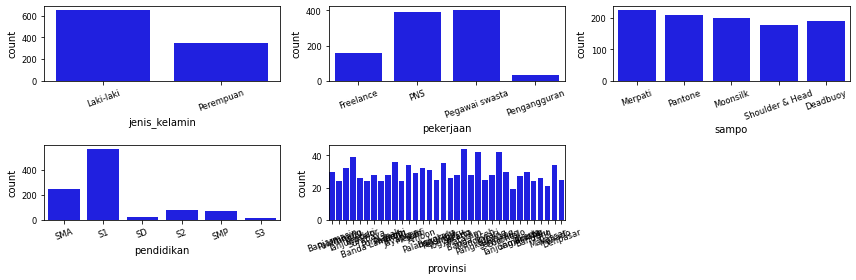

In [ ]:
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(df[cats[i]], color='blue', orient='v')
    plt.xticks(rotation=20)
    plt.tight_layout()

Finally, we look at the count plot for each data. As we observed earlier, the distribution of `education` and `occupation` is dominated by 1-2 values.


## Bivariate Analysis

After looking at each column individually, we will now look at the relationships between columns. Knowing the relationships between columns can help us choose the most important features and discard redundant features.

### Correlation heatmap

<AxesSubplot:>

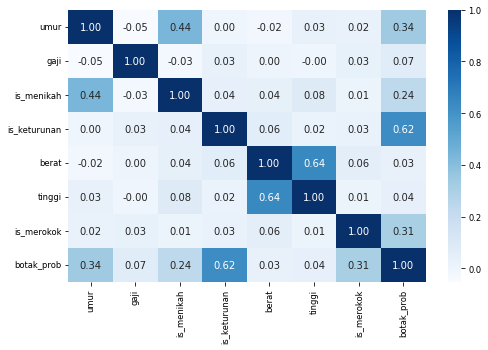

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

From the correlation heatmap above, it can be seen that:
* Our target `bald_prob` has a strong positive correlation with `is_descendant`.
* It also has a weak positive correlation with `age`, `is_married`, and `is_smoking`.
* `height` also has a strong positive correlation with `weight`. It is possible that these two *features* are redundant.

## Exploratory Data Analysis (EDA) Conclusion
Some things we found from this EDA dataset are:
* The data looks valid and there are no major defects.
* However, there are still rows with negative target variables, which is impossible, so it needs to be dropped later.
* There are also still empty/missing data, which must be taken care of during preprocessing.
* There are some slightly skewed distributions, this must be remembered if we want to do something or use a model that requires the assumption of a normal distribution.
* Some *features* have a clear correlation with the *target*, they will be used.
* Some *features* look completely uncorrelated, they should be ignored.
* From the Heatmap: there are features that are highly correlated with each other (weight/height) maybe only one will be used.